# Behavioral Analysis of Bike Usage Patterns to Increase Membership Conversion – Cyclistic 2025
Feb 25, 2026

This project follows the six steps of the data analysis process: Ask, Prepare, Process, Analyze, Share, and Act.

# Step 1. Ask
Understand the business task:

the Director of Marketing at Cyclistic believes that the company’s future growth depends on increasing the number of annual memberships. As a junior data analyst, my task is to analyze historical bike trip data and develop data-driven marketing strategies aimed at converting casual riders into annual members.

To address the business task, the following questions guide my analysis:

1.	How do annual members and casual riders differ in their bike usage behavior?
2.	Why might casual riders choose to purchase annual memberships?
3.	How can Cyclistic leverage digital marketing strategies to influence casual riders to become members?

My stakeholders: the primary stakeholders include Lily Moreno (Director of Marketing) and the Cyclistic executive team, who will review and approve my marketing recommendations. The secondary stakeholders include the marketing analytics team, who may use my findings for further analysis and strategic planning.


# Step 2. Prepare

The dataset used in this analysis consists of the Cyclistic's (a fiction company) historical bike trip data. The data was collected internally and made available for analytical purposes. It is considered reliable and original, as it reflects actual recorded trip activity from the company’s bike-share system. All the personal identifiable information has been removed from the data. The data is comprehensive, containing detailed trip-level information including ride ID, rideable type, start and end timestamps, station information, geographic coordinates, and rider classification (annual member or casual rider).

The data is organized in separate monthly CSV files in chronological order. For this analysis, I selected the 12 datasets from January 2025 through December 2025. Each file represents one month of trip data. These monthly datasets were combined into a single consolidated dataset to enable full-year analysis.

You can refer to the dataset [here](https://divvy-tripdata.s3.amazonaws.com/index.html).

To ensure credibility (ROCCC framework):

•	Reliable: Data originates from the company's internal tracking system.

•	Original: Primary data source, not third-party.

•	Comprehensive: Includes millions of ride records across an entire year.

•	Current: The 2025 dataset reflects recent user behavior.

•	Cited: Publicly available and properly attributed.

# Step 3. Process
The 12 monthly datasets were combined into one consolidated dataset using Python here in the notebook. Before performing analysis, a copy of the raw data was preserved to maintain data integrity. The dataset was cleaned by converting timestamp columns into datetime format, creating new analytical features such as ride length and day_of_the week, and removing invalid or extreme outlier records. Missing values were reviewed and handled appropriately without removing critical information unnecessarily. After cleaning and feature engineering, the dataset was reduced to a refined version ready for analysis and visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
data_files = glob.glob("/2025*-divvy-tripdata.csv")
combined_data = pd.concat((pd.read_csv(f) for f in data_files), ignore_index=True)
combined_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BADF67E2C5058F19,classic_bike,2025-05-11 17:22:39.471,2025-05-11 18:11:19.249,DuSable Lake Shore Dr & North Blvd,LF-005,Winthrop Ave & Lawrence Ave,TA1308000021,41.911722,-87.626804,41.968812,-87.657659,member
1,0210AE485D59C8C5,electric_bike,2025-05-05 08:02:09.251,2025-05-05 08:12:07.549,Damen Ave & Grand Ave,TA1308000006,Desplaines St & Jackson Blvd,15539,41.892394,-87.676885,41.878119,-87.643948,member
2,5E68FE5B9283E4C4,classic_bike,2025-05-02 10:32:33.062,2025-05-02 10:39:07.262,LaSalle St & Illinois St,13430,Clark St & Elm St,TA1307000039,41.890762,-87.631697,41.903322,-87.632999,member
3,13D2DCD6FB872858,classic_bike,2025-05-12 11:12:16.579,2025-05-12 11:17:25.126,Milwaukee Ave & Rockwell St,13242,Damen Ave & Cortland St,13133,41.920330,-87.693090,41.915983,-87.677335,member
4,F04DF9EE163351DD,classic_bike,2025-05-01 10:13:36.821,2025-05-01 10:17:40.548,Halsted St & Roosevelt Rd,TA1305000017,Clinton St & Roosevelt Rd,WL-008,41.867324,-87.648625,41.867118,-87.641088,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5552989,D13C1FED7727A9C0,electric_bike,2025-10-11 17:16:21.046,2025-10-11 17:31:02.868,Michigan Ave & Ida B Wells Dr,CHI00250,NaN,NaN,41.876203,-87.624464,41.890000,-87.630000,member
5552990,EC76AA5F4AB2D806,electric_bike,2025-10-15 07:54:02.067,2025-10-15 08:03:08.947,Franklin St & Jackson Blvd,CHI02050,NaN,NaN,41.877708,-87.635321,41.890000,-87.620000,member
5552991,B1FF79BE5CF46C1F,electric_bike,2025-10-25 16:44:17.353,2025-10-25 16:46:57.222,W Armitage Ave & N Sheffield Ave,CHI00836,NaN,NaN,41.917805,-87.653449,41.920000,-87.650000,member
5552992,33AA0D781A9A7CD6,electric_bike,2025-10-08 17:10:12.295,2025-10-08 17:17:00.968,W Armitage Ave & N Sheffield Ave,CHI00836,NaN,NaN,41.917805,-87.653449,41.930000,-87.660000,member


In [3]:
# Convert the combined data into a csv file
combined_data.to_csv("cyclistic_bike_trip_2025.csv", index=False)
print(f"Combined {len(data_files)} files.")
print(f"Total rows: {len(combined_data):,}")

Combined 12 files.
Total rows: 5,552,994


In [4]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5552994 entries, 0 to 5552993
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 550.8+ MB


In [5]:
# copy the combined dataset
data = combined_data.copy()

In [6]:
# convert to datetime
data["started_at"] = pd.to_datetime(data["started_at"])
data["ended_at"] = pd.to_datetime(data["ended_at"])

# create ride length
data["ride_length"] = (data["ended_at"] - data["started_at"]).dt.total_seconds()

# remove invalid rides
data = data[data["ride_length"] > 0]

# create day of week (Excel style)
data["day_of_week"] = data["started_at"].dt.dayofweek + 1

print("Cleaning complete.")


Cleaning complete.


In [7]:
# check for NaN values
data.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,1184669
start_station_id,1184669
end_station_name,1243299
end_station_id,1243299
start_lat,0
start_lng,0


Several columns contain null values. The columns with the most missing values (NaNs) are start_station_name, start_station_id, end_station_name, and end_station_id. However, these rows cannot be removed because the bikes may have been unlocked outside of designated stations, or the missing values may be due to GPS issues. Removing them would result in the loss of valid trip data.

In [8]:
data.dtypes

,0
ride_id,object
rideable_type,object
started_at,datetime64[ns]
ended_at,datetime64[ns]
start_station_name,object
start_station_id,object
end_station_name,object
end_station_id,object
start_lat,float64
start_lng,float64


The data types are all correct. Great.

In [9]:
# Remove outliers, in this rides longer than 24 hours, and
# rides shorter than 10 seconds
data = data[data["ride_length"] < pd.Timedelta(hours=24).total_seconds()]
data = data[data["ride_length"] > pd.Timedelta(seconds=10).total_seconds()]

In [10]:
# Create some additional features I believe will be useful for my analysis
data["hour"] = data["started_at"].dt.hour
data["month"] = data["started_at"].dt.month
data["week_type"] = data["day_of_week"].apply(lambda x: "weekend" if x > 5 else "weekday")

In [11]:
# check for row count
data.shape

(5515906, 18)

In [12]:
print("rows after cleaning:", data.shape[0])
print("rows before cleaning:", combined_data.shape[0])

rows after cleaning: 5515906
rows before cleaning: 5552994


The number of columns increased from 13 to 18 because I created five new columns: ride_length, day_of_week, hour, month, and week_type. A total of 37,088 rows were automatically removed because they were outliers, had negative ride lengths, or contained invalid trip or timestamp values.

Note: Removing these 37,088 rows will not significantly affect the analysis, as they only represent a very small percentage ($37,088 / 5552994 \approx 0.67\%$) of the total dataset.

# Step 4. Analysis

In [13]:
data["member_casual"].value_counts()  # see how many ananual members and casual users

,count
member_casual,
member,3533816
casual,1982090


In [14]:
data["member_casual"].value_counts(normalize=True) * 100    # Convert to percentages

,proportion
member_casual,
member,64.065921
casual,35.934079


The rider distribution analysis shows that annual members account for approximately $64\%$ of total rides, while casual riders account for $36\%$. This indicates that a significant portion of users are already members, but there remains a substantial base of casual riders who represent potential conversion opportunities.

Next, I want to compare the behavior differences between members and casual riders.

In [15]:
# Compare average ride length by rider type
data.groupby("member_casual")["ride_length"].mean() / 60

,ride_length
member_casual,
casual,19.255608
member,12.015466


In [16]:
# Compare median length by rider type
data.groupby("member_casual")["ride_length"].median() / 60

,ride_length
member_casual,
casual,11.457408
member,8.620533


This ride duration analysis indicates that casual riders have a higher average (19.26 min) and median (11.46 min) ride length compared to members, who average 12.02 min with a median of 8.62 min. This suggests that casual riders tend to use bikes for longer leisure-oriented trips, while members primarily use bikes for shorter trips, likely for commuting or routine transportation.

### Now, I will examine ride patterns by day_of_week and by hour of the day to identify temporal usage trends.

In [17]:
# Rides by day_of_week
data.groupby(["member_casual", "day_of_week"]).size().unstack()

day_of_week,1,2,3,4,5,6,7
member_casual,,,,,,,
casual,226356,223638,219606,255880,317231,410595,328784
member,500006,560018,547222,572891,526075,447430,380174


In [18]:
# And rides by hour
data.groupby(["member_casual", "hour"]).size().unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
member_casual,,,,,,,,,,,,,,,,,,,,,
casual,38560,24670,16505,9114,7229,11350,26376,49282,69924,70333,...,137681,152963,174207,188952,162299,120638,87125,74316,62775,45471
member,32244,19831,11916,7876,8818,34071,100540,198940,255317,166323,...,187272,235773,332518,379634,294086,203426,140579,109846,80072,49913


This ride frequency analysis by day_of_week shows that casual riders predominantly use bikes during weekends, with peak usage on Saturday and Sunday. In contrast, annual members demonstrate consistent usage throughout weekdays, indicating routine or commuting behavior.

Hourly distribution further supports this distinction. Members exhibit peak usage during traditional commuting hours (7–9 AM and 4–6 PM), while casual riders show increased activity during afternoon hours and weekends, suggesting recreational usage patterns.

These paterns suggest that membership marketing should target high-frequency weekday commuters among casual riders.

### Let's further analyze casual riders' ride behaviors in relation to start_station_name

In [19]:
data[data["member_casual"] == "casual"]["start_station_name"].value_counts().head(10)

,count
start_station_name,
DuSable Lake Shore Dr & Monroe St,31130
Navy Pier,27327
Streeter Dr & Grand Ave,23534
Michigan Ave & Oak St,22296
DuSable Lake Shore Dr & North Blvd,19324
Millennium Park,18944
Shedd Aquarium,16758
Theater on the Lake,15619
Dusable Harbor,15519


This sation-based analysis reveals that casual riders concentrate around major tourist and recreational areas such as Navy Pier and Millennium Park. This suggests that marketing efforts should be focusing on high-traffic leisure stations by promoting short-term membership incentives or targeted digital ads at these locations!

### But how to identify potential membership candidates?

In [20]:
# group casual riders by month
data[data["member_casual"] == "casual"].groupby(data["started_at"].dt.to_period("M")).size()

,0
started_at,
2024-12,37
2025-01,23913
2025-02,27555
2025-03,85077
2025-04,108215
2025-05,181179
2025-06,289111
2025-07,320298
2025-08,334989


This shows that casual ridership demonstrates strong seasonal variation, with peak usage occurring during summer, specifically July and August, and significant declines during winter. This suggests that casual riders primarily use Cyclistic bikes for seasonal leisure and tourism activities.

In [21]:
# group both casual riders and members by month
data.groupby(["member_casual", data["started_at"].dt.month]).size().unstack()

started_at,1,2,3,4,5,6,7,8,9,10,11,12
member_casual,,,,,,,,,,,,
casual,23913,27555,85077,108215,181179,289111,320298,334989,263279,222298,98342,27834
member,114054,123659,211111,260688,318144,384457,437333,449665,446816,420068,256125,111696


This seasonal trend analysis reveals that casual ridership increases more than tenfold during summer months, while member ridership remains comparatively stable throughout the year. This suggests that casual riders primarily use the service for leisure and seasonal activities, whereas members rely on Cyclistic for consistent transportation. Therefore, marketing efforts should target high-frequency summer casual riders with membership incentives before seasonal demand declines.

# Step 5. Share
### Due to the dataset size, I created aggregated datasets for use in my data viz both in this notebook and in Tableau.
The following visualizations issustrate the behavioral differences between rider types and to identify opportunities for membership conversion.

In [22]:
# Monthly trend dateset
data["month"] = data["started_at"].dt.month_name()
data["month_num"] = data["started_at"].dt.month

monthly_summary = (
    data.groupby(["member_casual", "month", "month_num"])
      .agg(
          ride_count=("ride_id", "count"),
          avg_ride_length=("ride_length", "mean")
      )
      .reset_index()
      .sort_values("month_num")
)

monthly_summary.to_csv("monthly_summary.csv", index=False)

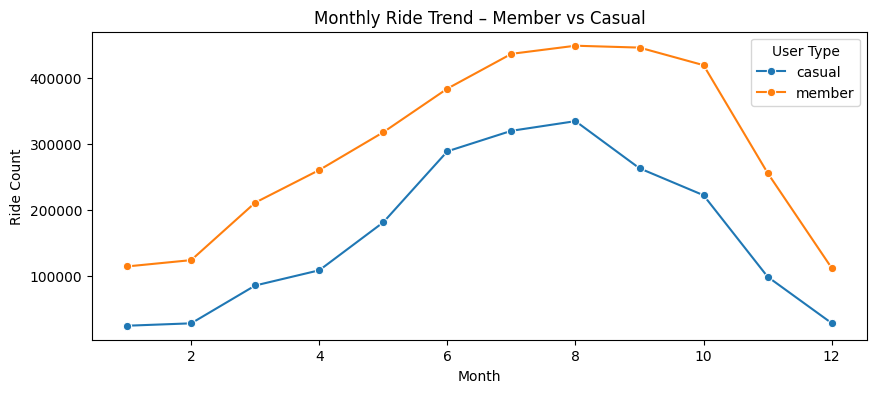

In [23]:

plt.figure(figsize=(10,4))

sns.lineplot(
    data=monthly_summary,
    x="month_num",
    y="ride_count",
    hue="member_casual",
    marker="o"
)

plt.title("Monthly Ride Trend – Member vs Casual")
plt.xlabel("Month")
plt.ylabel("Ride Count")
plt.legend(title="User Type")
plt.show()

This line chart compares monthly ride counts between members and casual riders. It shows strong seasonality in casual ridership, with significant increases during summer months and sharp declines during winter. Member ridership remains relatively more stable throughout the year but still reflects seasonal fluctuations.

This suggests that casual riders primarily use Cyclistic bikes for seasonal leisure and tourism activities, while members rely on the service consistently for transportation.

In [24]:
# Weekly pattern dataset
data["day_name"] = data["started_at"].dt.day_name()

weekly_summary = (
    data.groupby(["member_casual", "day_name", "day_of_week"])
      .agg(
          ride_count=("ride_id", "count"),
          avg_ride_length=("ride_length", "mean")
      )
      .reset_index()
      .sort_values("day_of_week")
)

weekly_summary.to_csv("weekly_summary.csv", index=False)

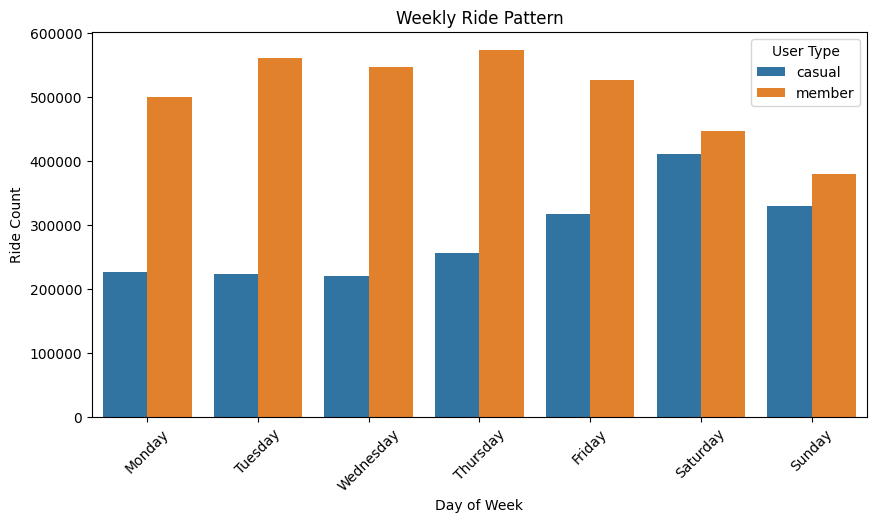

In [25]:
plt.figure(figsize=(10,5))

sns.barplot(
    data=weekly_summary,
    x="day_name",
    y="ride_count",
    hue="member_casual"
)

plt.title("Weekly Ride Pattern")
plt.xlabel("Day of Week")
plt.ylabel("Ride Count")
plt.xticks(rotation=45)
plt.legend(title="User Type")
plt.show()

The bar chart compares ride counts across weekdays shows that casual riders primarily use bikes on weekends, whereas members demonstrate higher activity during weekdays. This indicates that members are more likely to use bikes for commuting or routine travel, while casual riders use bikes for recreational purposes.

In [26]:
# Hourly usage datase
data["hour"] = data["started_at"].dt.hour

hourly_summary = (
    data.groupby(["member_casual", "hour"])
      .size()
      .reset_index(name="ride_count")
)

hourly_summary.to_csv("hourly_summary.csv", index=False)

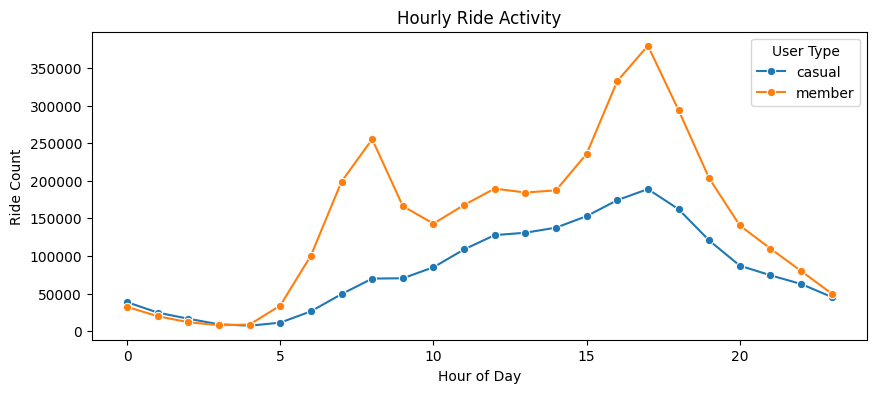

In [27]:
plt.figure(figsize=(10,4))

sns.lineplot(
    data=hourly_summary,
    x="hour",
    y="ride_count",
    hue="member_casual",
    marker="o"
)

plt.title("Hourly Ride Activity")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Count")
plt.legend(title="User Type")
plt.show()

This hourly analysis highlights peak activity for members during traditional commuting hours (morning and evening rush hours). In contrast, casual riders show increased usage during afternoon hours and weekends. This reinforces the behavioral distinction between commuter-based usage and leisure-based usage.

In [28]:
# Overall ride length comparison
ride_length_summary = (
    data.groupby("member_casual")
      .agg(
          avg_ride_length=("ride_length", "mean"),
          median_ride_length=("ride_length", "median"),
          ride_count=("ride_id", "count")
      )
      .reset_index()
)

ride_length_summary.to_csv("ride_length_summary.csv", index=False)

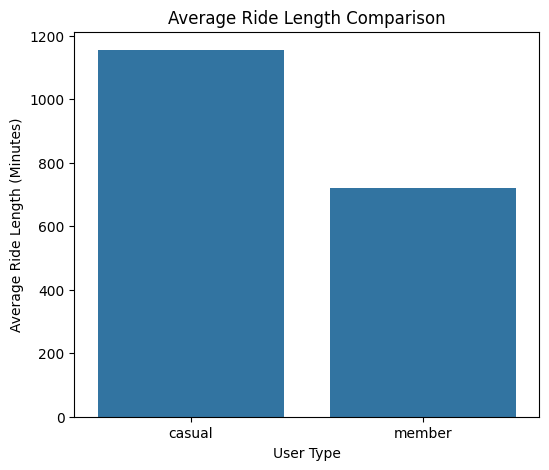

In [29]:
plt.figure(figsize=(6,5))

sns.barplot(
    data=ride_length_summary,
    x="member_casual",
    y="avg_ride_length"
)

plt.title("Average Ride Length Comparison")
plt.xlabel("User Type")
plt.ylabel("Average Ride Length (Minutes)")
plt.show()

This last comparison of average ride length between rider types shows that casual riders have longer trip durations than annual members. This further supports the interpretation that casual riders use bikes for recreational exploration, while members take shorter, more functional trips.

# Step 6. Act
Based on the analysis, Cyclistic should focus on converting high-frequency casual riders into annual members by targeting them during peak usage periods such as summer months, weekends, and high-traffic tourist locations.

### Key Recommendations:

1. **Target high-frequency summer casual riders.**

Cyclistic should promote discounted or time-limited membership offers to casual riders who show high activity during summer months. These riders already use the service frequently, making them strong candidates for conversion.

2. **Promote membership to weekend and leisure riders**

Since casual riders primarily use bikes on weekends and for longer trips, marketing campaigns should highlight how annual memberships provide better value for frequent weekend users. Perhabs personalized cost-saving messages could encourage upgrades.

3. **Use geotargeted marketing at popular stations**

Most casual rides start at tourist and recreational locations such as waterfront and downtown stations. Cyclistic should place digital ads, QR codes, or membership promotions at these high-traffic stations to capture riders when engagement is highest.

# Conclusion
### This analysis showed clear differences in how casual riders and annual members use Cyclistic bikes. Casual riders tend to ride more during the summer, on weekends, and at popular tourist locations, and their trips are generally longer. Annual members use the bikes more consistently throughout the year, especially during weekday commuting hours, and their trips are shorter and more routine. These patterns suggest that many frequent casual riders could benefit from becoming members. By focusing marketing efforts on high-usage casual riders and promoting membership benefits at key times and locations, Cyclistic can increase membership conversions and support long-term growth.